# **Bike Rental For YULU**
Making a mode to identify which variable corresponds to more bike rentals and which variables optimizes the process for more renting. Hence increasing in sales and profit. The statistical analysis will improve the User Experience(UX) by targeting the required options for improvement.

We have incorporated two methods for variable selection:
1. **Variable Selection Approach One**
    * This approach uses `correlation` to understand the linear relationship between variables.
2. **Variable Selection Approach Two**
   * This approach fitt the `Regression Model` to identify which variable will increase the $R^2$ for the fitted model. And will be considered for implimentation.



# Importing Required Libraries
Importing libraries which is required for mathematical computation and statistical analysis.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset
Upload dataset on seesion Runtime.

In [ ]:
data=pd.read_csv("/content/Bike Rental.csv")

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Breaking Data into `continuos` and `categorical`
Breaking down `data` into `data_cont`, `data_cat` for `continuos`,`categorical` variables for further analysis.

In [ ]:
data_cont=data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
data_cat=data[['dteday','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','cnt']]

In [ ]:
data_cont.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0,3,13,16
1,0.22,0.2727,0.80,0.0,8,32,40
2,0.22,0.2727,0.80,0.0,5,27,32
3,0.24,0.2879,0.75,0.0,3,10,13
4,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data_cat.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,01-01-2011,1,0,1,0,0,6,0,1,16
1,01-01-2011,1,0,1,1,0,6,0,1,40
2,01-01-2011,1,0,1,2,0,6,0,1,32
3,01-01-2011,1,0,1,3,0,6,0,1,13
4,01-01-2011,1,0,1,4,0,6,0,1,1


In [ ]:
corr_cont=data_cont.corr()
corr_cont

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


# **Variable Selection Approach One**
By using `Correlation` as variable selection measure.

# Heatmap for Correlation
Below is the heatmap of correlation among different variables in the form of a square. Darker color corresponds to more linaerly releated and lighter color corresponds to less linearly correlated.

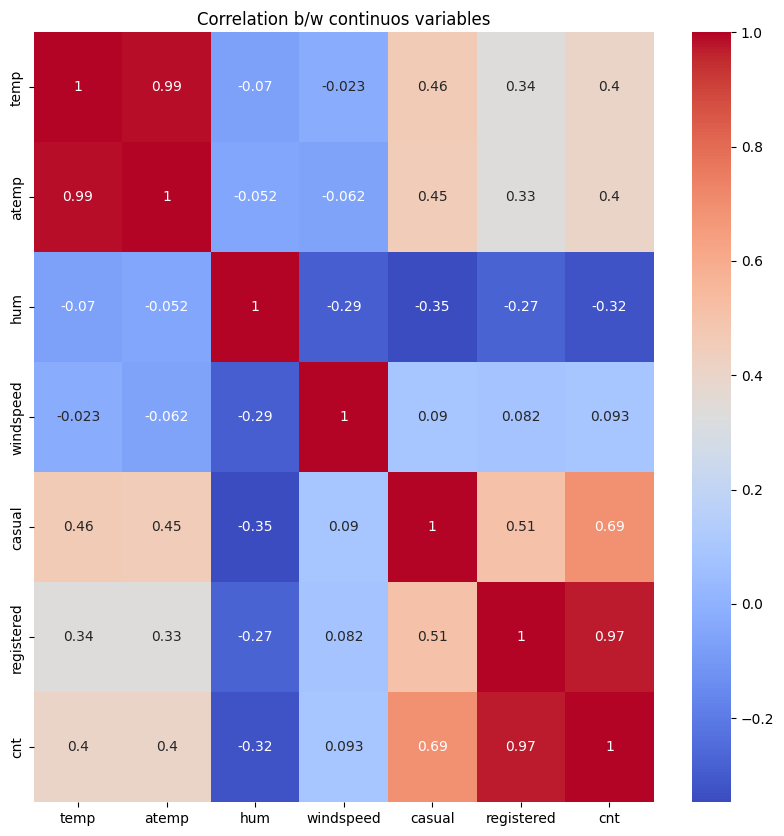

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_cont,annot=True,cmap='coolwarm')
plt.title("Correlation b/w continuos variables")
plt.show()

# Scatterplots
Plotting scatterplots for `temp`,`atemp`,`hum`,`windspeed`,`casual` and `registered` vs `cnt` to visualize their linear relationship.

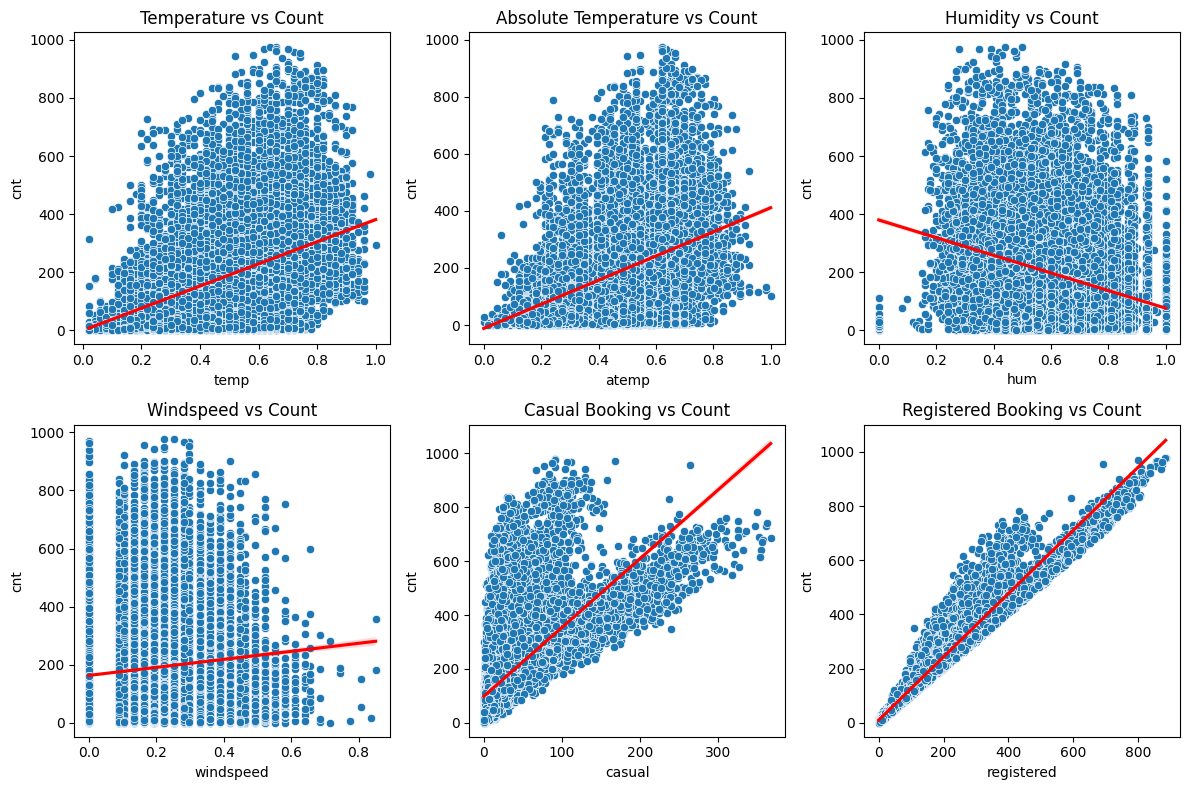

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.scatterplot(x='temp',y='cnt',data=data_cont,ax=axes[0,0])
sns.regplot(x='temp', y='cnt', data=data, scatter=False, color='red',ax=axes[0,0])
axes[0, 0].set_title('Temperature vs Count')

sns.scatterplot(x='atemp',y='cnt',data=data_cont,ax=axes[0,1])
sns.regplot(x='atemp', y='cnt', data=data, scatter=False, color='red',ax=axes[0,1])
axes[0, 1].set_title('Absolute Temperature vs Count')

sns.scatterplot(x='hum',y='cnt',data=data_cont,ax=axes[0,2])
sns.regplot(x='hum', y='cnt', data=data, scatter=False, color='red',ax=axes[0,2])
axes[0, 2].set_title('Humidity vs Count')

sns.scatterplot(x='windspeed',y='cnt',data=data_cont,ax=axes[1,0])
sns.regplot(x='windspeed', y='cnt', data=data, scatter=False, color='red',ax=axes[1,0])
axes[1, 0].set_title('Windspeed vs Count')

sns.scatterplot(x='casual',y='cnt',data=data_cont,ax=axes[1,1])
sns.regplot(x='casual', y='cnt', data=data, scatter=False, color='red',ax=axes[1,1])
axes[1, 1].set_title('Casual Booking vs Count')

sns.scatterplot(x='registered',y='cnt',data=data_cont,ax=axes[1,2])
sns.regplot(x='registered', y='cnt', data=data, scatter=False, color='red',ax=axes[1,2])
axes[1, 2].set_title('Registered Booking vs Count')

plt.tight_layout()
plt.show()

# Inference for Continuos Variables
There are six continuos vriables present in our dataset namely:


1. `temp`-  Normalised temperature, maximum(41 d.Celcius)
2. `atemp`- Absolute temp normalised as weel, maxx(50 d.Celcius)
3. `hum`- Humidity for that day.
4. `windspeed`- windspeed for that day.
5. `casual`- Number of casual user used the cab service. A casual user is one who is not registered in the database.
6. `registered`- A registered user is one who is in company database and uses company app.

On plotting the `Scattterplot` along with `Linear Regression Line` to visualize the linear relationship between the variables onto the `cnt` of bookings.


*   `temp`, `casual` and `registered` are positively releated to `cnt`. Hence people to to book rent more on the warmer days(to reduce pollution as global warming)
*   While `hum` is negatively correlated to the `cnt` which means when humidity increases there is less booking for the booking services.
* Where `windspeed` does not correspond to the `cnt` directly or significantly.




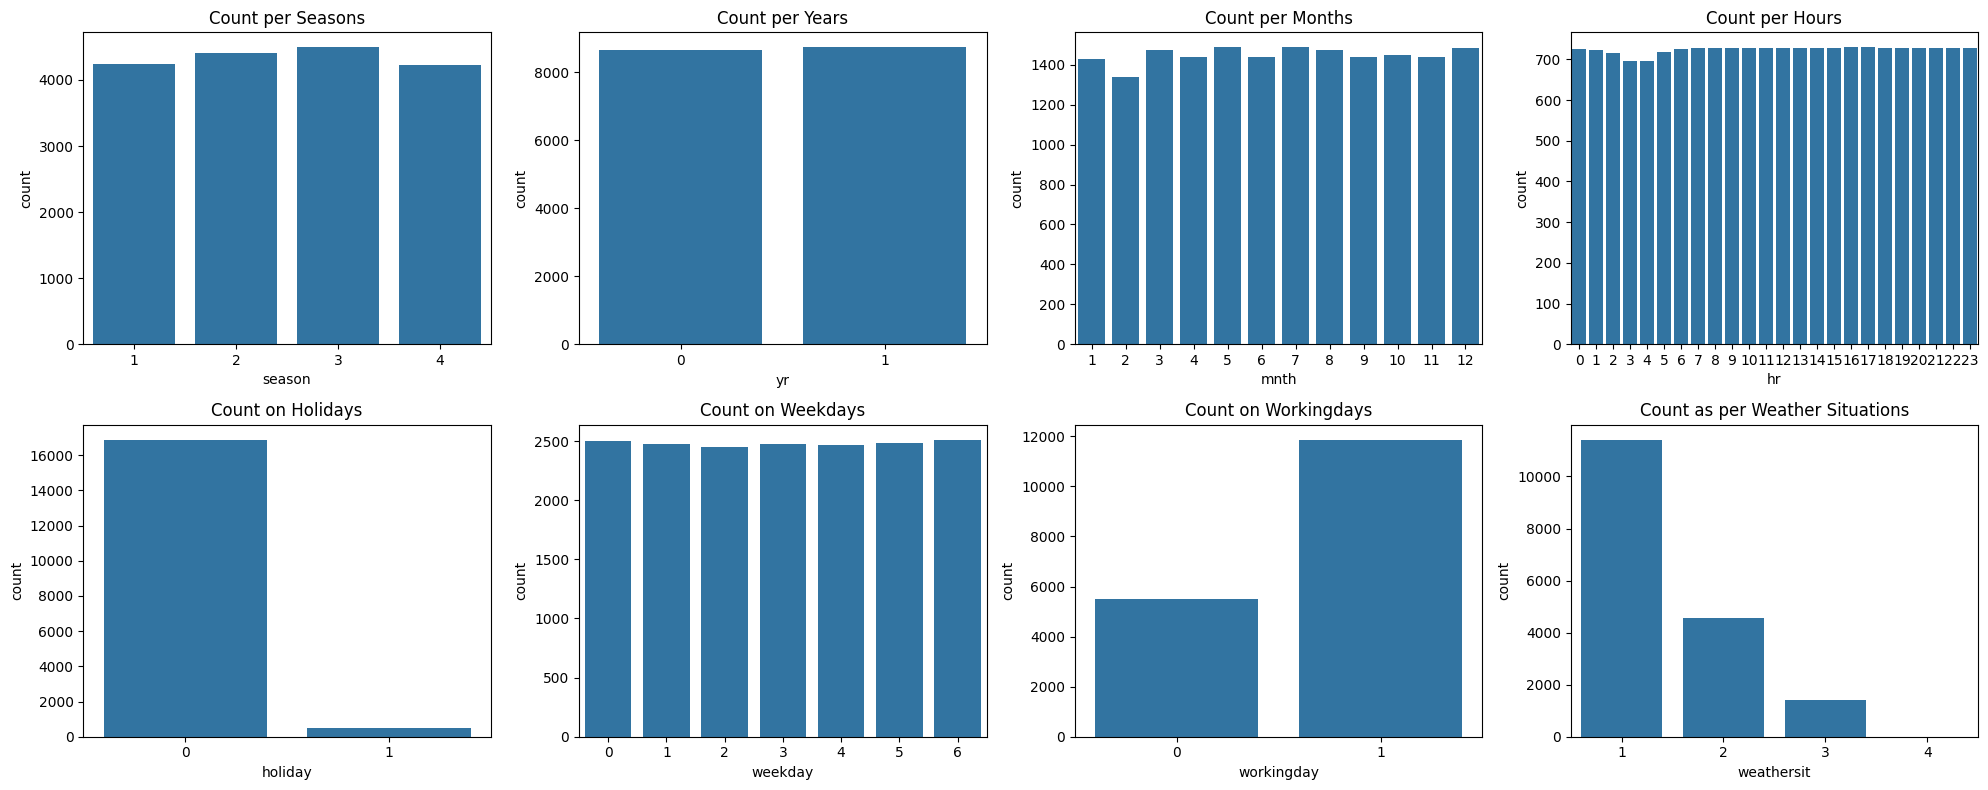

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(20,8))

 #'season','yr','mnth','hr','holiday','weekday','workingday','weathersit'
sns.countplot(x='season', data=data_cat,ax=axes[0,0])
axes[0,0].set_title("Count per Seasons")

sns.countplot(x='yr', data=data_cat,ax=axes[0,1])
axes[0,1].set_title("Count per Years")

sns.countplot(x='mnth', data=data_cat,ax=axes[0,2])
axes[0,2].set_title("Count per Months")

sns.countplot(x='hr', data=data_cat,ax=axes[0,3])
axes[0,3].set_title("Count per Hours")

sns.countplot(x='holiday', data=data_cat,ax=axes[1,0])
axes[1,0].set_title("Count on Holidays")

sns.countplot(x='weekday', data=data_cat,ax=axes[1,1])
axes[1,1].set_title("Count on Weekdays")

sns.countplot(x='workingday', data=data_cat,ax=axes[1,2])
axes[1,2].set_title("Count on Workingdays")

sns.countplot(x='weathersit', data=data_cat,ax=axes[1,3])
axes[1,3].set_title("Count as per Weather Situations")

plt.tight_layout()
plt.show()


# Inference for Categorical Variables

There are six continuos vriables present in our dataset namely:

1. `season`- season when the booking done. Where `1`, `2`, `3`,`4` corresponds to `spring`,`summer`,`fall`,`winter`.
2. `yr`- year of the booking. Where `0` correspond to 2011 and `1` to 2012
3. `mnth`- month of the booking. From `1` to `12`.
4. `hr`- hour when the booking done. From `0` to `23`.
5. `holiday`- Whether holiday or not. `0`=`not a holiday`and  
   `1`=`holiday`   
6. `weekday`- day of the week. `0`=`Sunday` and so on to `6`=`Saturday`
7. `workingday`- Whether working day or not.
8. `weathersit`- Weather situation when the booking done.
 * `1`->`{Clear, Few clouds, Partly cloudy, Partly cloudy}`
 * `2`->`{ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist}`
 * `3`-> `{Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds}`
 * `4`->`{Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog}`

On plotting the `countplot` for the categorical variables. We have drawn the following conclusion:
* There are similar booking for `2011` and `2012`
* There is similar effect\patterns present in `season`, `hr`, `mnth` and `weekday` showing the regular nature of booking. Or one can interpret it as the Bike Renting is pretty much feasible among the customers.
* There is less booking on the `holidays`.
* There is more booking on `weekday` when there is no holiday as well as now weekend.
* People rent out bike more on the pleasent/calmer weather situation as compared to more harsh or unpleasant weather situation.


# **Variable Selection Approach Two**
Using `Regression` for variable selection.

# Selection of Variables(Feautre Selection) on the basis of Correlation
Using the easiest method of variables selection(Using Correlation) we have reached the conclusion to include most significant variables which correspond to more bikes rentals as follows:
1.   **`temp`**
2.   **`casual`**
3.   **`registered`**
4.   **`holidays`**
5.   **`workingdays`**
6.   **`weathersit`**



# Fitting Regression using OLS Method and Performing Feautre Extraction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X = data[['season', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

#Splitting test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_sm = sm.add_constant(X_train)
model1 = sm.OLS(y_train, X_train_sm).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     620.7
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        04:13:44   Log-Likelihood:                -89882.
No. Observations:               13903   AIC:                         1.798e+05
Df Residuals:                   13894   BIC:                         1.799e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.6820      7.700     16.711      0.0

# `model1` Summary
* Significant variables for the `cnt` predictions are as `season`,`holiday`,`weathersit`,`atemp`,`hum` and `windspeed` by `model1`.
* Model explained about `26%` varibility of data.
* Model equation is:
$cnt=\beta_0+\beta_1*season+\beta_2*holiday+\beta_3*weathersit+\beta_4*atemp+\beta_5*hum+\beta_6*windspeed+e$


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_2 = data[['season', 'holiday', 'workingday', 'weathersit', 'atemp', 'windspeed']]
y_2 = data[['cnt']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y, test_size=0.2,random_state=0)
X_const_2 = sm.add_constant(X_2)

model2= sm.OLS(y_2, X_const_2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     684.2
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        04:13:44   Log-Likelihood:            -1.1320e+05
No. Observations:               17379   AIC:                         2.264e+05
Df Residuals:                   17372   BIC:                         2.265e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1500      5.872     -4.283      0.0

# `model2` Summary
* Significant variables for the `cnt` predictions are `const` `season`,`holiday`,`weathersit`,`atemp` and `windspeed` by `model2`.
* Model explained about `19%` varibility of data.
* Model equation is:
$cnt=\beta_0+\beta_1*season+\beta_2*holiday+\beta_3*weathersit+\beta_4*atemp+\beta_5*windspeed+e$


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

X_3 = data[['season', 'holiday', 'workingday', 'weathersit', 'atemp', 'windspeed', 'hr', 'yr']]
y_3 = data[['cnt']]

#Splitting datatse into train and test part.
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y, test_size=0.2,random_state=0)

X_const_3 = sm.add_constant(X_3)

model3= sm.OLS(y_3, X_const_3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     1212.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        04:13:44   Log-Likelihood:            -1.1119e+05
No. Observations:               17379   AIC:                         2.224e+05
Df Residuals:                   17370   BIC:                         2.225e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -137.4968      5.493    -25.032      0.0

# `model3` Summary
* Significant variables for the `cnt` predictions are `const` `season`,`holiday`,`weathersit`,`atemp`,`windspeed`,`hr` and `yr` by `model3`.
* Model explained about `36%` varibility of data.
* Model equation is:
$cnt=\beta_0+\beta_1*season+\beta_2*holiday+\beta_3*weathersit+\beta_4*atemp+\beta_5*windspeed+\beta_6*hr+\beta_7*yr+e$

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

#Predictions for `model1`
ypred_1=model1.predict(sm.add_constant(X_test))

#Predictions for `model2`
ypred_2=model2.predict(sm.add_constant(X2_test))

#Predictions for `model3`
ypred_3=model3.predict(sm.add_constant(X3_test))

#RMSE of model1`
rmse1= np.sqrt(mean_squared_error(y_test, ypred_1))

#RMSE of model2`
rmse2= np.sqrt(mean_squared_error(y_test, ypred_3))

#RMSE of model3`
rmse3= np.sqrt(mean_squared_error(y3_test, ypred_3))

#MAE for model1
mae1= mean_absolute_error(y_test, ypred_1)

#MAE for model2
mae2= mean_absolute_error(y_test, ypred_2)

#MAE for model3
mae3= mean_absolute_error(y_test, ypred_3)
print(f"Root Mean Squared Error (RMSE): {rmse1} and Mean Absolute Error (MAE): {mae1} for model1")
print(f"Root Mean Squared Error (RMSE): {rmse2} and Mean Absolute Error (MAE): {mae2} for model2")
print(f"Root Mean Squared Error (RMSE): {rmse3} and Mean Absolute Error (MAE): {mae3} for model3")

Root Mean Squared Error (RMSE): 154.90001616334558 and Mean Absolute Error (MAE): 114.6903978482536 for model1
Root Mean Squared Error (RMSE): 145.63584361491425 and Mean Absolute Error (MAE): 123.36923811479377 for model2
Root Mean Squared Error (RMSE): 145.63584361491425 and Mean Absolute Error (MAE): 108.52287450526156 for model3


Here the `RMSE` for `model1`, `model2`, `model3` and `MAE` are computed.
`RMSE` and `MAE` should be lower for better predictions and for thaat our `model3` outperformed with the values of `RMSE` and `MAE` close to `146` and `109`.

# Variable Selection as per the Regresion Model Fittings(`model1`,`model2` and `model3`)
Since `model3` outperforms the variability criterion explained(RSquared) for data so we will consider thoose varibles present in `model3`, which are listed as below:


1.  `season`
2.  `holiday`
3.  `weathersit`
4.  `atemp`
5.  `windspeed`
6.  `hr`
7.  `yr`

The above seven variables correspond more in defining the variability for the Bike Rentals.